In [1]:
!pip install torchviz torchinfo

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchvision import transforms, datasets, models
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.io import read_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device = ", device)

device =  cuda


In [3]:
## matplot default
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ":"
plt.rcParams['axes.unicode_minus'] = False

In [4]:
!git clone https://github.com/wikibook/pythonlibs.git
from pythonlibs.torch_lib1 import *

Cloning into 'pythonlibs'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 25 (delta 6), reused 25 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 21.10 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [4]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2025-09-08 00:41:32--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 3.165.102.31, 3.165.102.113, 3.165.102.62, ...
Connecting to download.pytorch.org (download.pytorch.org)|3.165.102.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  --.-KB/s    in 0.09s   

2025-09-08 00:41:32 (495 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [5]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [6]:
import os

In [7]:
data_dir = "hymenoptera_data"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "val")

print(train_dir)
print(test_dir)



hymenoptera_data/train
hymenoptera_data/val


In [8]:
##
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

transform_test= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [11]:
##
train_set = datasets.ImageFolder(
    train_dir,
    transform_train
)

test_set = datasets.ImageFolder(
    test_dir,
    transform_test
)

In [12]:
print(len(train_set))
print(len(test_set))


244
153


In [13]:
batch_size = 10

train_loader = DataLoader(
  train_set,
  batch_size,
  True
)

test_loader = DataLoader(
  test_set,
  batch_size,
  True
)

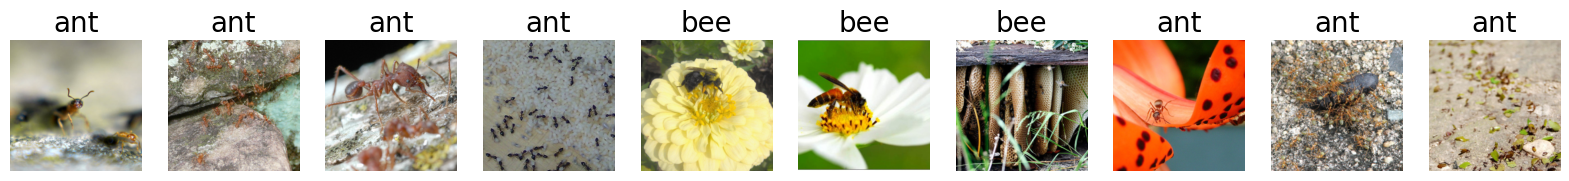

In [14]:
classes = ["ant", "bee"]
show_images_labels(test_loader,classes, None, None)

In [16]:
##
weights = models.VGG19_BN_Weights.IMAGENET1K_V1
vgg19 = models.vgg19_bn(weights = weights)

print('vgg19 = \n', vgg19)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


100%|██████████| 548M/548M [00:02<00:00, 234MB/s]


vgg19 = 
 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2

In [17]:
## transfer learning, freezing

for parameter in vgg19.parameters():
  parameter.requires_grad = False

in_features = vgg19.classifier[6].in_features
n_classes = len(classes)

vgg19.classifier[6] = nn.Linear(in_features, n_classes)
vgg19.avgpool = nn.Identity()

print("vgg19 = \n", vgg19)

vgg19 = 
 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2

In [18]:
vgg19 = vgg19.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg19.parameters(), momentum=0.9)

num_epochs = 2
history = np.zeros((0, 5))
history = fit(vgg19, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [1/2], loss: 0.05227 acc: 0.71721 val_loss: 0.01801, val_acc: 0.96078


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [2/2], loss: 0.03314 acc: 0.87705 val_loss: 0.01661, val_acc: 0.95425


## Model from scratch (ResNet18)

In [ ]:
# class Bottleneck(nn.Module):


In [45]:
from torch import nn
from typing import Optional, List, Type
import torch.nn.functional as F

class BasicBlock(nn.Module):
  expansion = 1

  def __init__(self, inplanes: int, planes: int, stride: int = 1,
               downsample: Optional[nn.Module] = None, groups: int = 1,
               dilation: int = 1, norm_layer: Optional[nn.Module] = None):
    super().__init__()

    # default batch norm
    if norm_layer is None:
      norm_layer = nn.BatchNorm2d

    # first layer
    self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride = stride,
                           padding = dilation, groups=groups, bias = False, dilation = dilation)
    self.bn1 = norm_layer(planes)
    self.relu = nn.ReLU(inplace=True)

    # second layer
    self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride = 1,
                           padding = dilation, groups = groups, bias = False, dilation = dilation)
    self.bn2 = norm_layer(planes)

    self.downsample = downsample # channel matching
    self.stride = stride

  def forward(self, x):
    identity = x
    # first conv1
    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)
    # seocnd conv2
    out = self.conv2(out)
    out = self.bn2(out)

    if self.downsample is not None:
      identity = self.downsample(identity)

    out += identity
    out = self.relu(out)

    return out

# def resnet18(num_classes: int = 1000, norm_layer: Optional[nn.Module] = None) -> ResNet18:
#   return ResNet18(
#       block = BasicBlock,
#       layers = [2, 2, 2, 2],
#       num_classes = num_classes, # cifar = 10
#       norm_layer = norm_layer # batchnorm2d
#   )

class ResNet18(nn.Module):
  def __init__(self, block: Type[nn.Module], layers: List[int], num_classes: int = 1000,
               groups:int = 1, width_per_groups: int = 64, norm_layer: Optional[nn.Module] = None):
    super().__init__()


    if norm_layer is None:
      norm_layer = nn.BatchNorm2d
    self._norm_layer = norm_layer

    ## init parameters
    self.inplanes = 64
    self.dilation = 1
    self.groups = groups
    self.base_width = width_per_groups

    ## Init conv layer
    self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding = 3, bias = False)
    self.bn1 = norm_layer(self.inplanes)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding = 1)

    ## BasicBlock
    self.layer1 = self._make_layer(block, 64, layers[0]) # nn.Sequential
    self.layer2 = self._make_layer(block, 128, layers[1])
    self.layer3 = self._make_layer(block, 256, layers[2])
    self.layer4 = self._make_layer(block, 512, layers[3])

    ## fully connected layer
    self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.fc = nn.Linear(512*block.expansion, num_classes)

  def _make_layer(self, block: Type[nn.Module], planes: int, blocks:int, stride: int = 1) -> nn.Sequential:
    downsample = None
    if self.inplanes != planes*block.expansion:
      downsample = nn.Sequential(
          nn.Conv2d(self.inplanes, planes*block.expansion, kernel_size=1, stride = stride, bias = False),
          self._norm_layer(planes*block.expansion)
      )

    layers = [block(self.inplanes, planes, stride, downsample, groups = self.groups,
                    dilation = self.dilation, norm_layer = self._norm_layer)]

    self.inplanes = planes*block.expansion

    for _ in range(1, blocks):
      layers.append(block(self.inplanes, planes, stride = 1, downsample =None, groups = self.groups,
                    dilation = self.dilation, norm_layer = self._norm_layer))

    return nn.Sequential(*layers)

  def forward(self, x):

    #Intial layer
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)

    # Basic block
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    # fc layer
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.fc(x)

    return x

In [46]:
def resnet18(num_classes: int = 1000, norm_layer: Optional[nn.Module] = None) -> ResNet18:
  return ResNet18(
      block = BasicBlock,
      layers = [2, 2, 2, 2],
      num_classes = num_classes, # cifar = 10
      norm_layer = norm_layer # batchnorm2d
  )

In [47]:
num_classes = 10

resnet18 = resnet18(num_classes = num_classes, norm_layer=None)
print('resnet18 = \n', resnet18)

resnet18 = 
 ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(i

In [48]:
from torchinfo import summary

summary(resnet18, (100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet18                                 [100, 10]                 --
├─Conv2d: 1-1                            [100, 64, 56, 56]         9,408
├─BatchNorm2d: 1-2                       [100, 64, 56, 56]         128
├─ReLU: 1-3                              [100, 64, 56, 56]         --
├─MaxPool2d: 1-4                         [100, 64, 29, 29]         --
├─Sequential: 1-5                        [100, 64, 29, 29]         --
│    └─BasicBlock: 2-1                   [100, 64, 29, 29]         --
│    │    └─Conv2d: 3-1                  [100, 64, 29, 29]         36,864
│    │    └─BatchNorm2d: 3-2             [100, 64, 29, 29]         128
│    │    └─ReLU: 3-3                    [100, 64, 29, 29]         --
│    │    └─Conv2d: 3-4                  [100, 64, 29, 29]         36,864
│    │    └─BatchNorm2d: 3-5             [100, 64, 29, 29]         128
│    │    └─ReLU: 3-6                    [100, 64, 29, 29]         --
│

## 데이터 준비

In [50]:
## class
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
num_classes = len(classes)

In [51]:
## Transform
transform_train = transforms.Compose([
    transforms.Resize(112),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

transform_test = transforms.Compose([
    transforms.Resize(112),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [52]:
## Dataset
data_root = "./data"

train_set = datasets.CIFAR10(
    data_root,
    True,
    transform_train,
    download=True
)

test_set = datasets.CIFAR10(
    data_root,
    False,
    transform_test,
    download=True
)

100%|██████████| 170M/170M [00:20<00:00, 8.49MB/s]


In [53]:
## Batch size
batch_size = 50

train_loader = DataLoader(
    train_set,
    batch_size,
    True
)

test_loader = DataLoader(
    test_set,
    batch_size,
    False
)

In [54]:
## 학습
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters())

num_epochs = 2
history = np.zeros((0, 5))

history = fit(resnet18, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/2], loss: 0.03388 acc: 0.36206 val_loss: 0.03049, val_acc: 0.45110


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

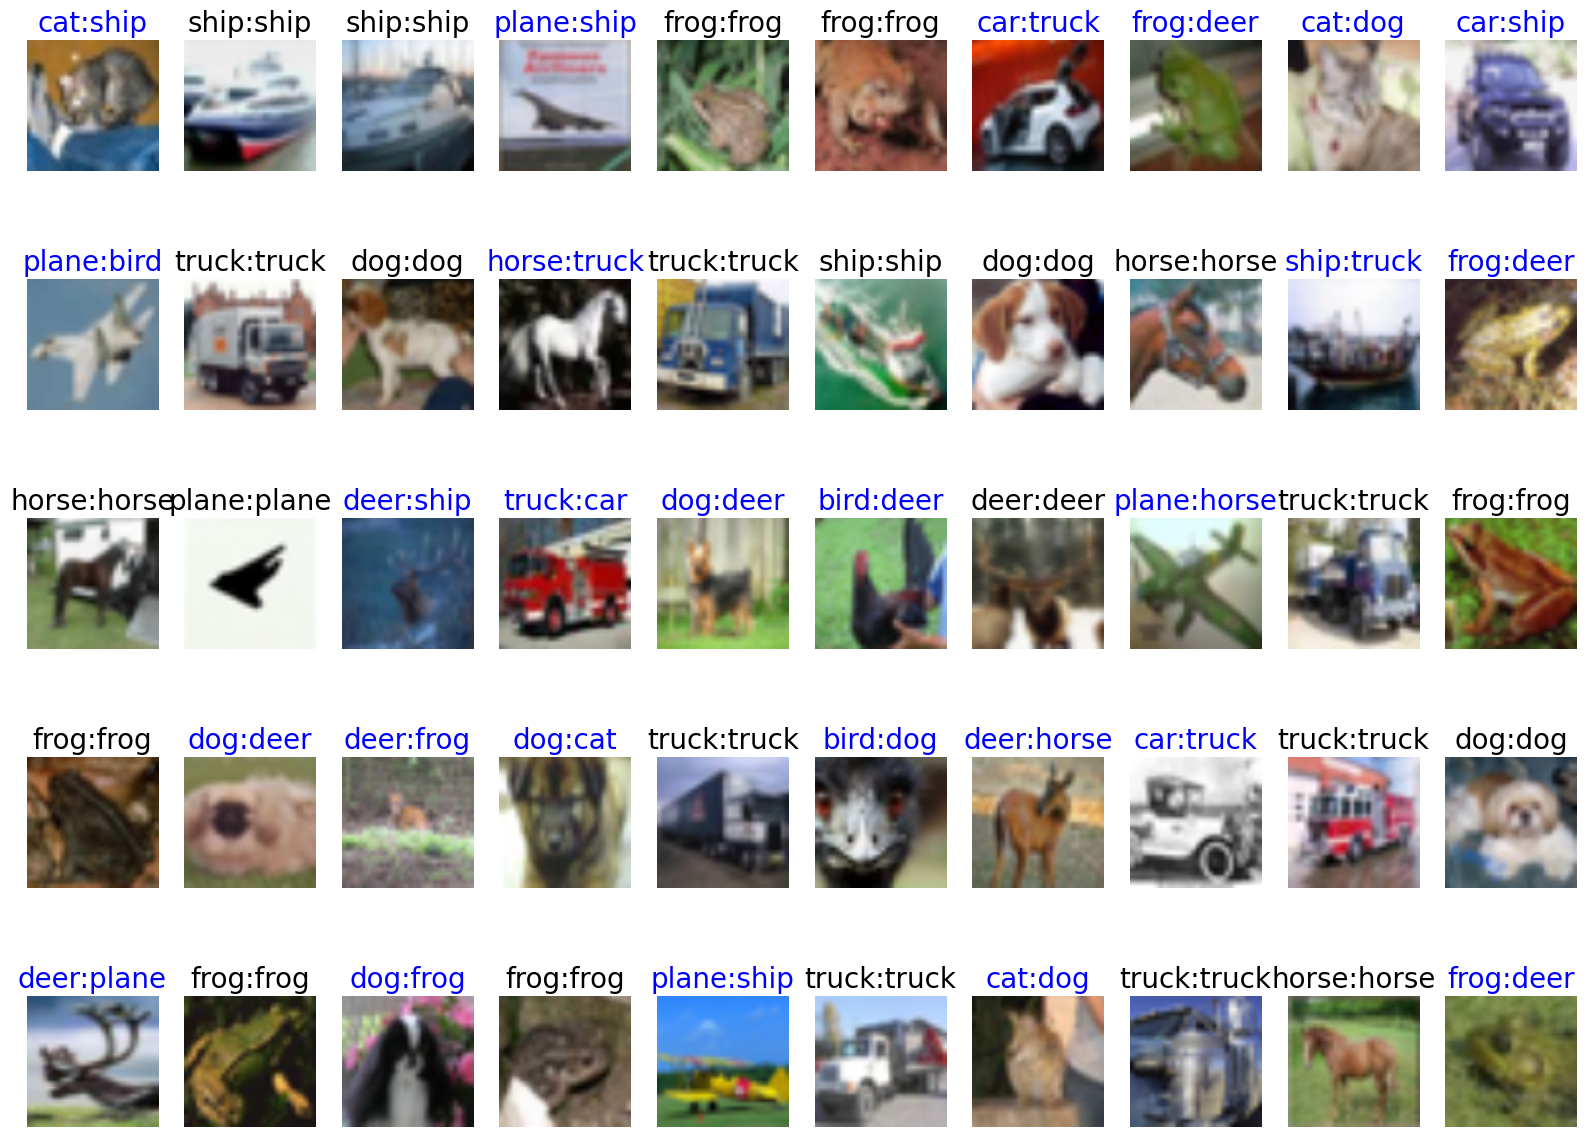

In [55]:
show_images_labels(test_loader, classes, resnet18, device)

# Faster RCNN

In [8]:
## Pretrained model
# from torchvision import transforms, datasets, models
dir(models.detection)

['FCOS',
 'FCOS_ResNet50_FPN_Weights',
 'FasterRCNN',
 'FasterRCNN_MobileNet_V3_Large_320_FPN_Weights',
 'FasterRCNN_MobileNet_V3_Large_FPN_Weights',
 'FasterRCNN_ResNet50_FPN_V2_Weights',
 'FasterRCNN_ResNet50_FPN_Weights',
 'KeypointRCNN',
 'KeypointRCNN_ResNet50_FPN_Weights',
 'MaskRCNN',
 'MaskRCNN_ResNet50_FPN_V2_Weights',
 'MaskRCNN_ResNet50_FPN_Weights',
 'RetinaNet',
 'RetinaNet_ResNet50_FPN_V2_Weights',
 'RetinaNet_ResNet50_FPN_Weights',
 'SSD300_VGG16_Weights',
 'SSDLite320_MobileNet_V3_Large_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'anchor_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcos',
 'fcos_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn'

## Faster RCNN 모델

In [9]:
weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
fasterRCNN = models.detection.fasterrcnn_resnet50_fpn(weights = weights)

print("fasterRCNN = \n", fasterRCNN)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 229MB/s]


fasterRCNN = 
 FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
        

## 추론하기

In [10]:
##
fasterRCNN = fasterRCNN.eval()
fasterRCNN = fasterRCNN.to(device)

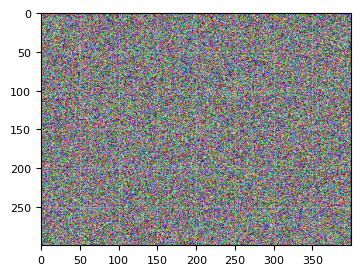

In [15]:
## Sample image
x = [torch.rand(3, 300, 400).to(device),
     torch.rand(3, 500, 500).to(device)]

plt.imshow(x[0].cpu().permute(1, 2, 0))
plt.show()

In [17]:
prediction = fasterRCNN(x)
print("Faster RCNN outputs = \n")
display(prediction)

Faster RCNN outputs = 



[{'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)},
 {'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)}]

## COCO_V1 Labels

In [20]:
coco_labels_list = weights.meta["categories"]
print("coco length = ", len(coco_labels_list))

coco_labels_list

coco length =  91


['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

In [86]:
data_dir = "./figures"

img_path = os.path.join(data_dir, "dog.jpg")
print("img path = ", img_path)

img_1 = read_image(img_path).to(device)
print("img shape = ", img.shape)

img path =  ./figures/dog.jpg
img shape =  torch.Size([3, 576, 768])


In [88]:
##
print("img shape = ", img.shape)
print("img min, max = ", img.min(), img.max())

preprocess = weights.transforms()
img = preprocess(img_1)
print("img shape = ", img.shape)
print("img min, max = ", img.min(), img.max())

img shape =  torch.Size([3, 576, 768])
img min, max =  tensor(0., device='cuda:0') tensor(1., device='cuda:0')
img shape =  torch.Size([3, 576, 768])
img min, max =  tensor(0., device='cuda:0') tensor(1., device='cuda:0')


In [35]:
## batch dimension
batch_img = img.unsqueeze(0)
print("batch img shape = ", batch_img.shape)

batch img shape =  torch.Size([1, 3, 576, 768])


In [40]:
## prediction
import time

start = time.time() # start time
pred = fasterRCNN(batch_img)
stop = time.time() # stop time
spend_time = stop - start

print(f"Estimation time = {spend_time*1000:.4f}ms")

display(pred)

Estimation time = 44.5893ms


[{'boxes': tensor([[130.3096, 225.0458, 319.0361, 534.0589],
          [163.7612, 104.9878, 570.4295, 448.7574],
          [127.9468, 139.2852, 277.1596, 382.7677],
          [471.6612,  79.2779, 680.4758, 169.9653],
          [129.2781, 231.7304, 218.7509, 381.2862],
          [467.3278,  83.1596, 678.7362, 167.9620],
          [711.6562,  29.0661, 760.4034, 244.5135],
          [132.6524, 122.8573, 409.6284, 420.0832],
          [676.1837,  98.1014, 718.5798, 155.4058],
          [126.9638, 132.6713, 436.8140, 404.2878],
          [ 58.3716,  85.2091, 103.5174, 127.3270],
          [599.1293, 105.8064, 619.8333, 122.4443],
          [ 55.8843,  86.5430,  84.3429, 135.6493],
          [134.2063, 215.0712, 322.5774, 536.3029],
          [ 58.4231,  79.5753, 106.1990, 127.5245],
          [600.6810, 107.6771, 613.7605, 120.5344],
          [718.4564,  28.6788, 766.1308, 269.9594],
          [124.7190, 138.1058, 591.1895, 512.2059],
          [677.8329,  32.0130, 744.8972, 163.6140],
   

## Bounding box 그리기

In [46]:
pred_dict = pred[0]

# print("pred_dict = \n", pred_dict)
print(pred_dict.keys())
print("bound boxes = \n", pred_dict["boxes"].shape)
print("="*100)
print("labels = ", pred_dict['labels'])
print("="*100)
print("scores = ", pred_dict['scores'])

dict_keys(['boxes', 'labels', 'scores'])
bound boxes = 
 torch.Size([25, 4])
labels =  tensor([18,  2,  2,  3,  2,  8, 64,  2, 64, 15, 64,  1, 64, 17,  4,  1, 72, 15,
        64,  4, 15, 62,  1, 31, 62], device='cuda:0')
scores =  tensor([0.9960, 0.9841, 0.8148, 0.7617, 0.6088, 0.5441, 0.3389, 0.3328, 0.2991,
        0.2789, 0.2676, 0.2548, 0.2136, 0.2030, 0.2030, 0.1513, 0.1428, 0.1047,
        0.0958, 0.0851, 0.0809, 0.0671, 0.0562, 0.0524, 0.0516],
       device='cuda:0', grad_fn=<IndexBackward0>)


In [112]:
threshold = 0.7

indices = pred_dict['scores'] >= threshold

pred_boxes = pred_dict["boxes"][indices]
pred_labels = pred_dict["labels"][indices]
pred_scores = pred_dict["scores"][indices]

print('pred boxes = \n', pred_boxes)
print('pred labels = \n', pred_labels)
print('pred scores = \n', pred_scores)

pred boxes = 
 tensor([[130.3096, 225.0458, 319.0361, 534.0589],
        [163.7612, 104.9878, 570.4295, 448.7574],
        [127.9468, 139.2852, 277.1596, 382.7677],
        [471.6612,  79.2779, 680.4758, 169.9653]], device='cuda:0',
       grad_fn=<IndexBackward0>)
pred labels = 
 tensor([18,  2,  2,  3], device='cuda:0')
pred scores = 
 tensor([0.9960, 0.9841, 0.8148, 0.7617], device='cuda:0',
       grad_fn=<IndexBackward0>)


In [81]:
import random
import cv2


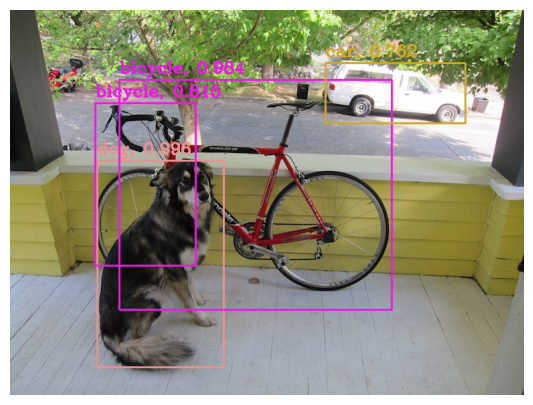

In [113]:
image = img_1.permute(1, 2, 0).cpu().numpy()
color_array = [[random.randint(0, 255) for _ in range(3)] for _ in range(91)] # [Red, Green, Blue], uint8

# display(color_array)
for i in range(len(pred_boxes)):
  x_min = int(pred_boxes[i][0])
  y_min = int(pred_boxes[i][1])
  x_max = int(pred_boxes[i][2])
  y_max = int(pred_boxes[i][3])

  color = color_array[pred_labels[i]] # Unique color to the category

  ## draw rectangle
  cv2.rectangle(img = image, pt1 = (x_min, y_min), pt2 = (x_max, y_max),
                color = color, thickness = 2)
  text = f"{coco_labels_list[pred_labels[i]]}, {pred_scores[i]:.3f}"
  cv2.putText(img = image, text = text,org = (x_min, y_min - 10),
              fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.8, color = color,
              thickness = 2)


plt.figure(figsize = (7, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

In [80]:
coco_labels_list[pred_labels[0]]

'dog'

img path =  ./figures/sheep.jpg
Estimation time = 48.6255ms


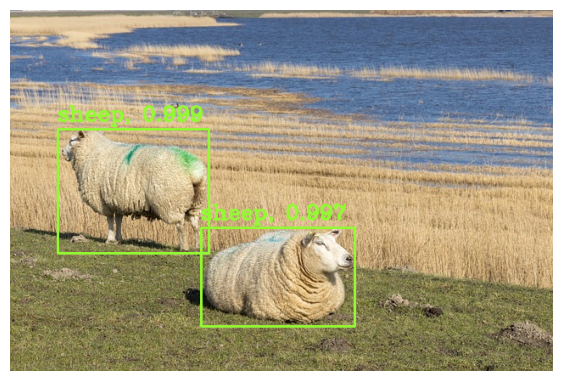

In [121]:
data_dir = "./figures"

# img_path = os.path.join(data_dir, "dog.jpg")
# img_path = os.path.join(data_dir, "kite.jpg")
# img_path = os.path.join(data_dir, "peoples.jpg")
# img_path = os.path.join(data_dir, "person.jpg")
img_path = os.path.join(data_dir, "sheep.jpg")


print("img path = ", img_path)

img_1 = read_image(img_path).to(device)

## preprocessing
preprocess = weights.transforms()
img = preprocess(img_1)
batch_img = img.unsqueeze(0)

## inference
start = time.time() # start time
pred = fasterRCNN(batch_img)
stop = time.time() # stop time
spend_time = stop - start

print(f"Estimation time = {spend_time*1000:.4f}ms")

## threshold
pred_dict = pred[0]

threshold = 0.7
indices = pred_dict['scores'] >= threshold

pred_boxes = pred_dict["boxes"][indices]
pred_labels = pred_dict["labels"][indices]
pred_scores = pred_dict["scores"][indices]

## draw bounding box
image = img_1.permute(1, 2, 0).cpu().numpy()
color_array = [[random.randint(0, 255) for _ in range(3)] for _ in range(91)] # [Red, Green, Blue], uint8

# display(color_array)
for i in range(len(pred_boxes)):
  x_min = int(pred_boxes[i][0])
  y_min = int(pred_boxes[i][1])
  x_max = int(pred_boxes[i][2])
  y_max = int(pred_boxes[i][3])

  color = color_array[pred_labels[i]] # Unique color to the category

  ## draw rectangle
  cv2.rectangle(img = image, pt1 = (x_min, y_min), pt2 = (x_max, y_max),
                color = color, thickness = 2)
  text = f"{coco_labels_list[pred_labels[i]]}, {pred_scores[i]:.3f}"
  cv2.putText(img = image, text = text,org = (x_min, y_min - 10),
              fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.8, color = color,
              thickness = 2)


plt.figure(figsize = (7, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

# 의미 분할 (Semantic segmenation)